# HW 9

In [2]:
%%capture
import __init__ as CFC

import math
import numpy as np
import matplotlib.pyplot as plt

import math
from scipy.optimize import root_scalar

## 9.2 Oblique Shock Polar

In [3]:
machs = [1.25, 1.5, 2, 3, 4]
gamma = 1.4

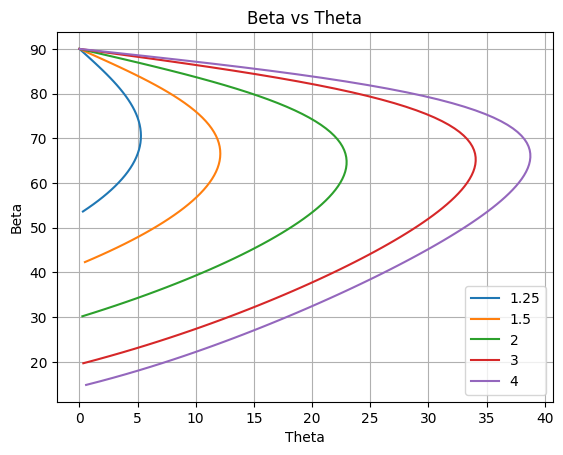

In [4]:
betas = np.linspace(math.radians(10), math.pi / 2, 100)

for mach in machs:
  results = []

  for beta in betas:
    res = CFC.ThetaBetaMach(gamma, mach=mach, beta=beta)
    if res.theta > 0:
      results.append(res)

  bs = [math.degrees(res.beta) for res in results]
  ts = [math.degrees(res.theta) for res in results]

  plt.plot(ts, bs, label=mach)  # Swap the order of the variables
plt.xlabel('Theta')  # Update the label
plt.ylabel('Beta')  # Update the label
plt.title('Beta vs Theta')  # Update the title
plt.legend()  # Add a legend
plt.grid(True)  # Add a grid
plt.show()

## 9.3 Wind Tunnel Testing

### 9.3 a)

In [5]:
nitrogen_gamma = 1.470

shock_angle = math.radians(20)
surface_angle = math.radians(10)

tbm = CFC.ThetaBetaMach(nitrogen_gamma, beta=shock_angle, theta=surface_angle)
tbm

Theta: 0.174533
Beta:  0.349066
Mach:  4.850817

### 9.3 b)

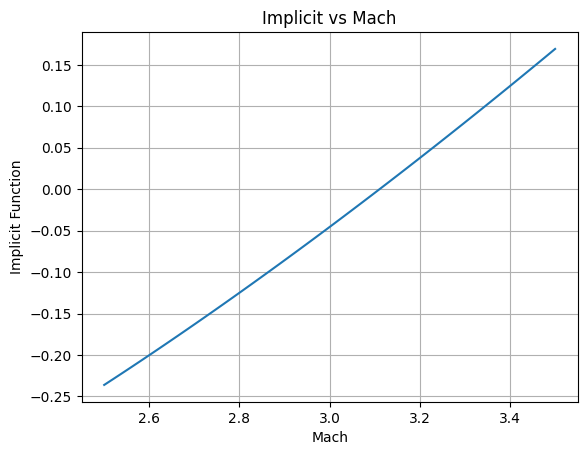

3.110532087190909

In [6]:
air_gamma = 1.4

p_infin = 4e3
p_surf = 8.4e3

def p_two_over_infin(gamma, mach, theta):
  return CFC.ObliqueShock(gamma, mach=mach, theta=theta).shock_ratio.pressure_ratio

machs = []
implicits = []

for mach in np.linspace(2.5, 3.5):
  try:
    implicit = p_two_over_infin(air_gamma, mach, surface_angle) - p_surf / p_infin
  except:
    implicit = None
  
  if implicit is not None:
    implicits.append(implicit)
    machs.append(mach)

plt.plot(machs, implicits)
plt.xlabel('Mach')
plt.ylabel('Implicit Function')
plt.title('Implicit vs Mach')
plt.grid(True)
plt.show()

mach = root_scalar(lambda m: p_two_over_infin(air_gamma, m, surface_angle) - p_surf / p_infin, bracket=[2.5, 3.5]).root
mach

## 9.4 Supersonic Expansion

In [7]:
mach_one = 2
p_one = 45e3
T_one = 250

p_two = 12e3

def p_two_over_one(gamma, mach_one, mach_two):
  p_stag_over_one = CFC.IsentropicRatio(gamma, mach_one).pressure_ratio
  p_stag_over_two = CFC.IsentropicRatio(gamma, mach_two).pressure_ratio

  return p_stag_over_one / p_stag_over_two

mach_two = root_scalar(lambda m: p_two_over_one(air_gamma, mach_one, m) - p_two / p_one, bracket=[2.5, 3.5]).root
mach_two

2.851245065152407

In [8]:
pm = CFC.PrandtlMeyer(gamma, mach_one=mach_one, mach_two=mach_two)
print(f"theta: {math.degrees(pm.theta):.3f}")

theta: 20.424
